In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nilearn as nl
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import image

c:\Users\jyoth\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
path = os.getcwd()
path

'c:\\Users\\jyoth\\Documents\\VIT_CSE\\3rd Year\\SEM 6\\fMRI'

In [4]:
try: 
    feat_file = os.path.join(path, 'Target.csv')
    res=pd.read_csv(feat_file)
    print("Target Values file found.")
except:
    s=path+'\\Data\\'
    ar=[]

    # folder path
    dir_path = path+r'\Data\\'
    res = []

    for path in os.listdir(dir_path):
        # check if current path is a folder
        if os.path.isdir(os.path.join(dir_path, path)):
            res.append(path)

    i2="\\session_1\\rest_1\\rest.nii.gz"
    fn=[]
    for i in res:
        x=s+i+i2
        fn.append(x)

    f=s+"Composite_Phenotypic.csv"
    df = pd.read_csv(f)

    j=[]
    for i in res:
        x = df[(df.SUB_ID==int(i))]
        asd =int(x.DX_GROUP)
        j.append(asd-1)
        #if asd==1:
        #    asd="Autism"
        #else:
        #    asd="Control"
    y_target=pd.DataFrame(columns=['ID','Cat'])
    y_target['ID']=res
    y_target['Cat']=j
    y_target.to_csv(path+"\\Target.csv")

    y_target=pd.DataFrame(j)
    print(len(y_target))
    

Target Values file found.


In [5]:
ind=list(res['ID'])
y_target=res['Cat']


In [6]:
try: # check if feature file already exists
        # load features
    feat_file = os.path.join(path, 'ABIDE_BASC064_features.npz')
    X_features = np.load(feat_file)['a']
    print("Feature file found.")

except:
    s=path+'\\Data\\'
    i2="\\session_1\\rest_1\\rest.nii.gz"
    fn=[]
    for i in res:
        x=s+i+i2
        fn.append(x) # if not, extract features
    fmri_filenames = fn

# load atlas
    multiscale = datasets.fetch_atlas_basc_multiscale_2015()
    atlas_filename = multiscale.scale064

        # initialize masker object
    masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=0)

        # initialize correlation measure
    correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True)
    X_features = [] # To contain upper half of matrix as 1d array
    print("No feature file found. Extracting features...")

    for i,sub in enumerate(fmri_filenames):
            # extract the timeseries from the ROIs in the atlas
        time_series = masker.fit_transform(sub)
            # create a region x region correlation matrix
        correlation_matrix = correlation_measure.fit_transform([time_series])[0]
            # add to our container
        X_features.append(correlation_matrix)
            # keep track of status
        print('finished extracting %s of %s'%(i+1,len(fmri_filenames)))
        # Save features
    Xt=pd.DataFrame(X_features)
    np.savez_compressed(os.path.join(output_dir, 'ABIDE_BASC064_features'), a = Xt)



Feature file found.


In [7]:
Xt=pd.DataFrame(X_features)
np.savez_compressed(os.path.join(path, 'ABIDE_BASC064_features'), a = Xt)

In [8]:
feat_file = os.path.join(path, 'ABIDE_BASC064_features.npz')
X_features = np.load(feat_file)['a']

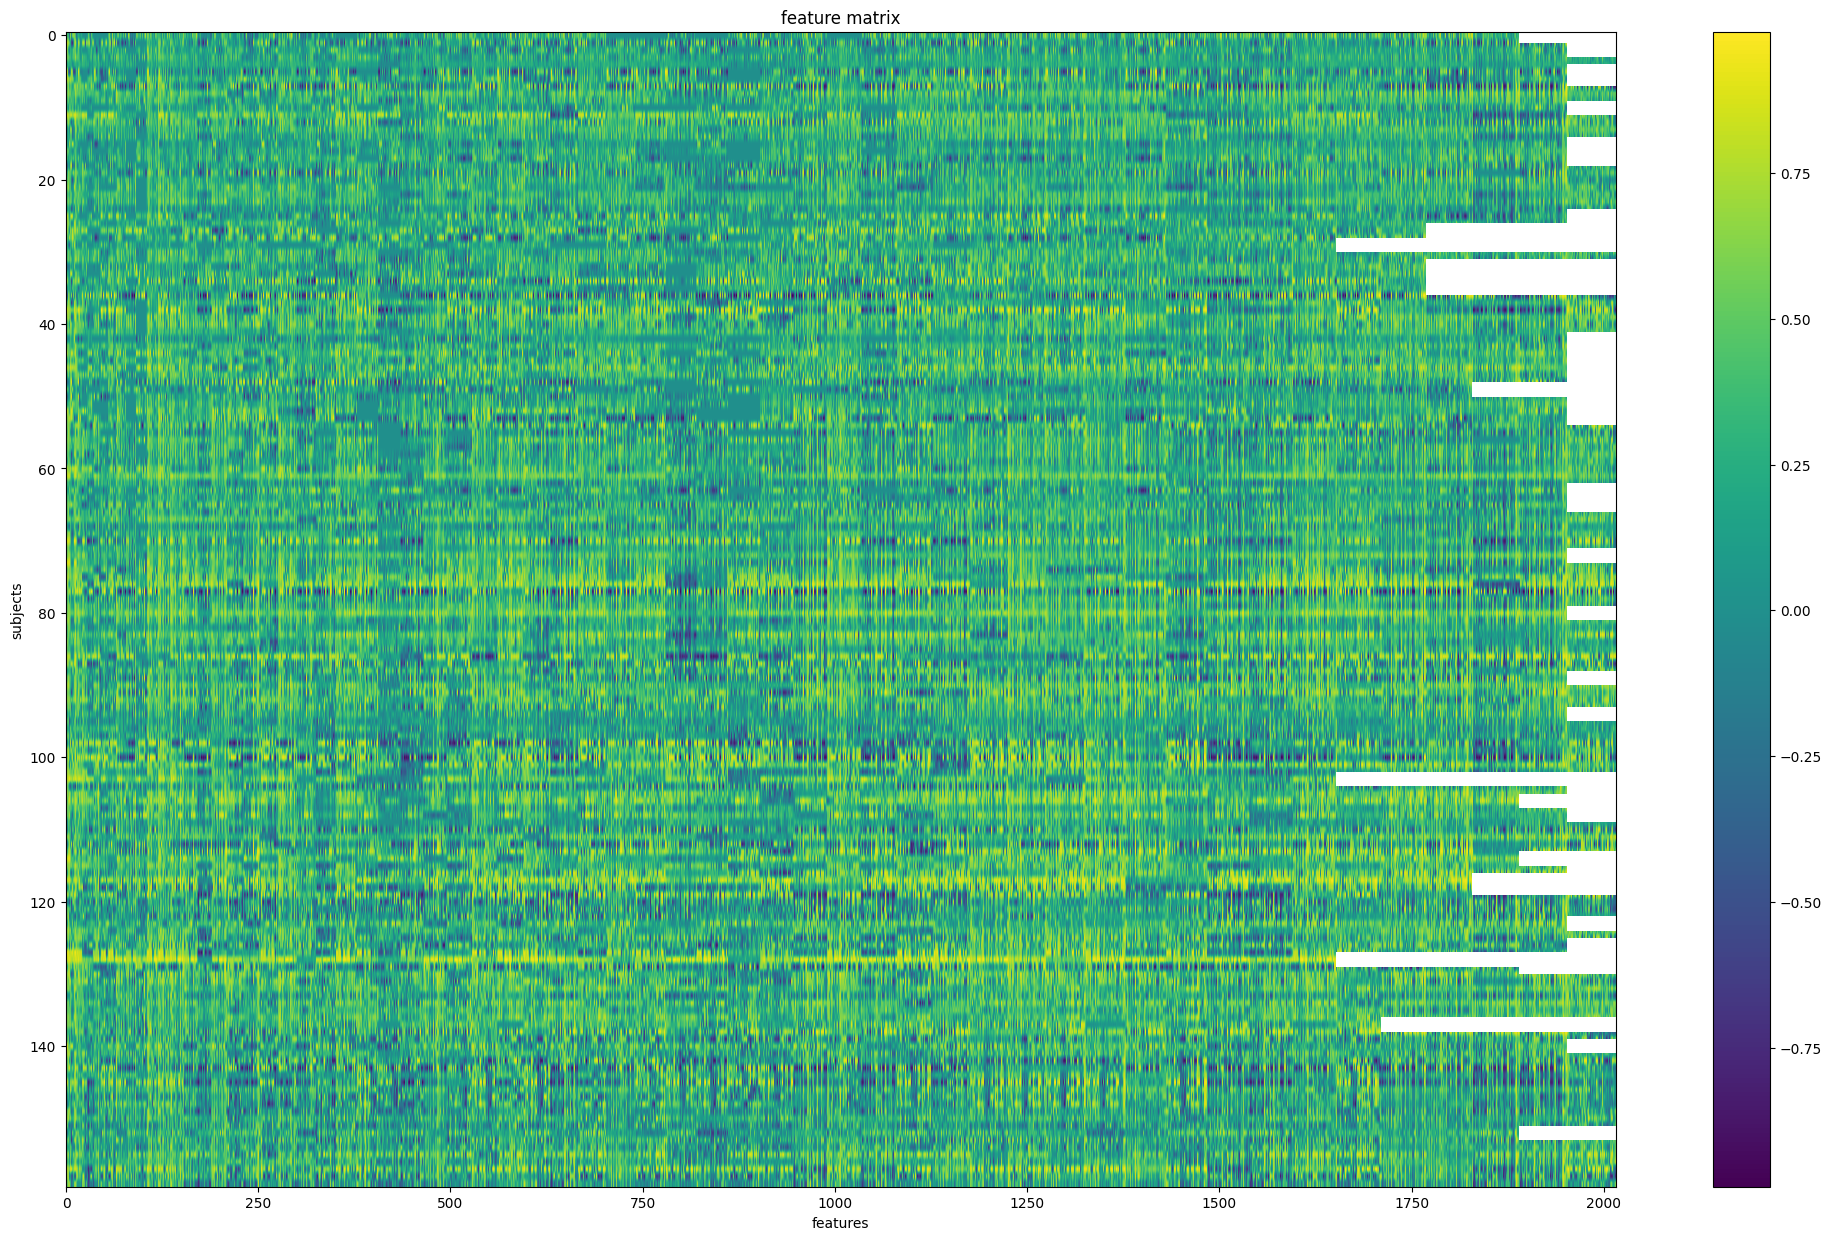

In [9]:
plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

In [10]:
xt1 = Xt

In [11]:
xt1['y']=y_target
xt1=xt1.dropna()
y_target=xt1['y']
xt1 = xt1.drop(['y'],axis=1)


print(len(y_target), len(xt1))

114 114


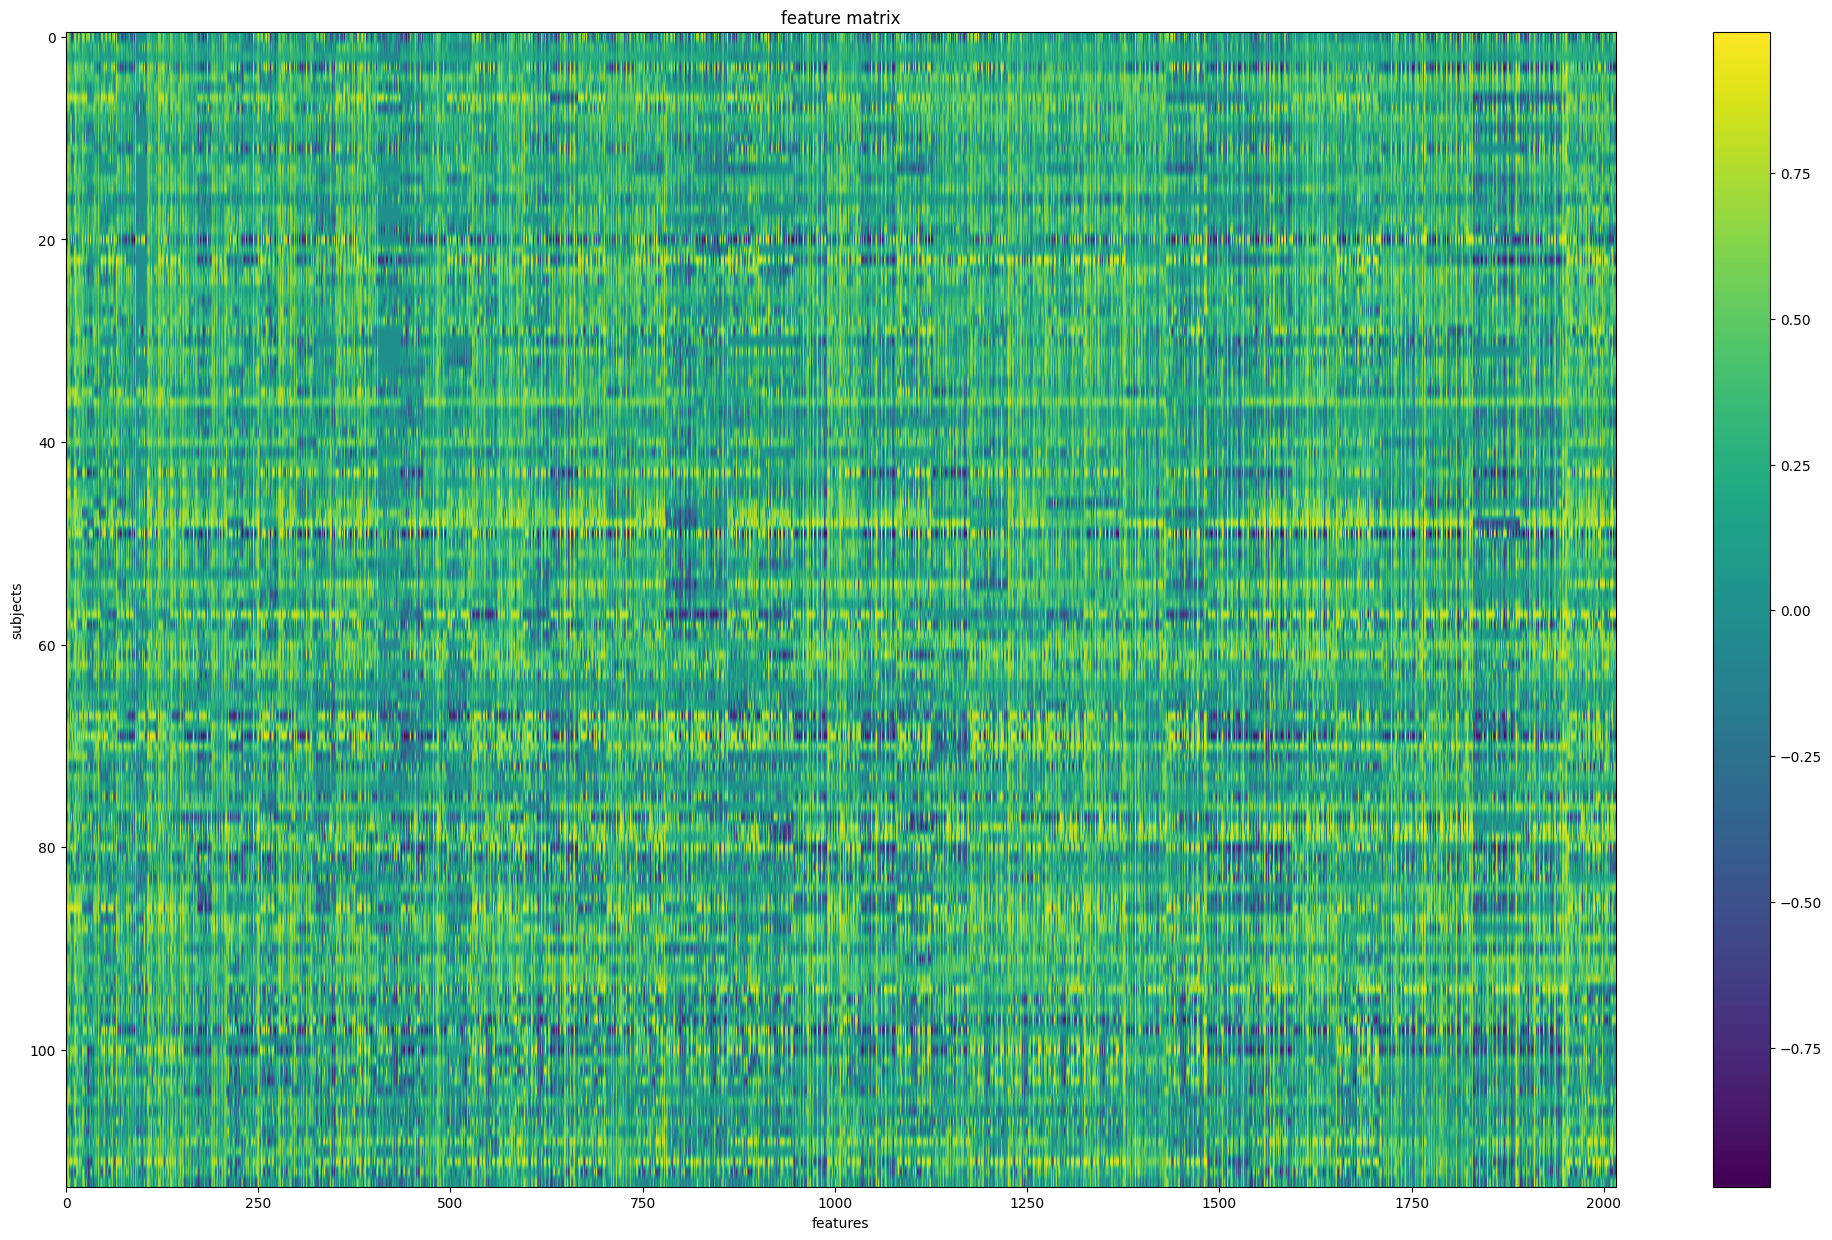

In [12]:
plt.imshow(xt1, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

In [14]:
f=path+"\\Composite_Phenotypic.csv"
df = pd.read_csv(f)

d=pd.DataFrame(columns=["DX_GROUP","ASD_DSM_5","AGE_AT_SCAN" ,"SEX","HANDEDNESS_CATEGORY"], index= ind)
for i in ind:
    
    x = df[(df.SUB_ID==i)]

    d.loc[i] = list(x[["DX_GROUP","ASD_DSM_5","AGE_AT_SCAN ","SEX","HANDEDNESS_CATEGORY"]].values.flatten().tolist())
    #print((x[["DX_GROUP","PDD_DSM_IV_TR","ASD_DSM_5","AGE_AT_SCAN ","SEX","HANDEDNESS_CATEGORY"]].values.flatten().tolist()))

old=[]
new=[]
for i in res:
    x = df[(df.SUB_ID==int(i))]
    old.append(list(x[["AGE_AT_SCAN "]].values.flatten().tolist())[0])
    new.append(int(round(list(x[["AGE_AT_SCAN "]].values.flatten().tolist())[0])))

ValueError: invalid literal for int() with base 10: 'Unnamed: 0'

In [ ]:
d["DX_GROUP"]=d["DX_GROUP"].replace([1.0, 2.0],["ASD","Control"])
# d["HANDEDNESS_CATEGORY"] = d["HANDEDNESS_CATEGORY"].replace()
d["AGE_AT_SCAN"]=d["AGE_AT_SCAN"].replace(old,new)
d.head()

DX_GROUP ASD_DSM_5  AGE_AT_SCAN  SEX HANDEDNESS_CATEGORY
28852  Control       0.0         10.0  1.0                 NaN
28853      ASD       1.0         11.0  1.0                 1.0
28854  Control       0.0         11.0  1.0                 1.0
28855      ASD       1.0         13.0  1.0                 1.0
28856      ASD       1.0          8.0  1.0                 1.0

<Axes: >

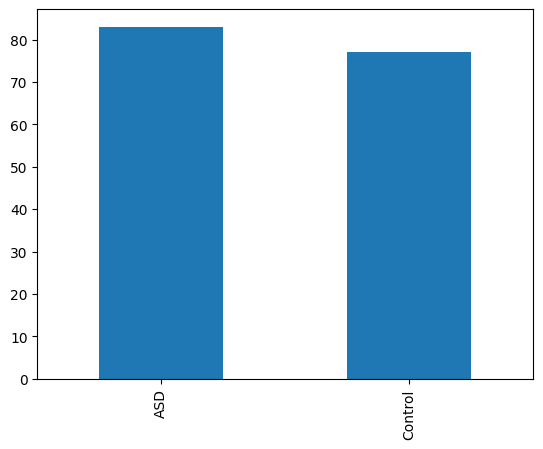

In [ ]:
d["DX_GROUP"].value_counts().plot(kind="bar")

<Axes: >

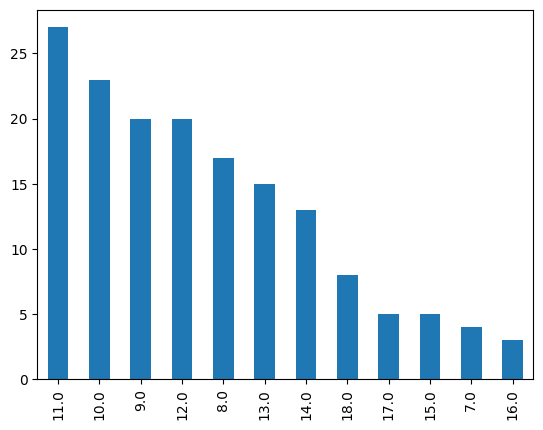

In [ ]:
d["AGE_AT_SCAN"].value_counts().plot.bar()

<Axes: >

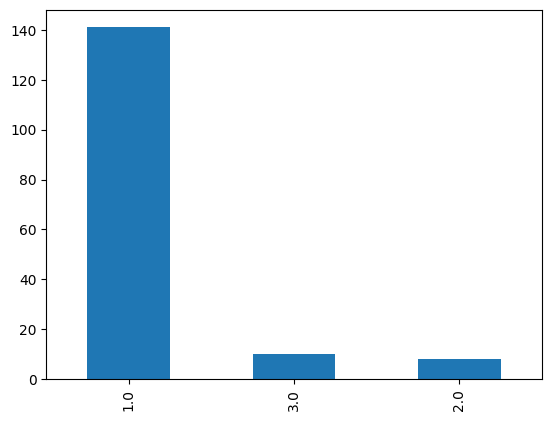

In [ ]:
d["HANDEDNESS_CATEGORY"].value_counts().plot(kind="bar")

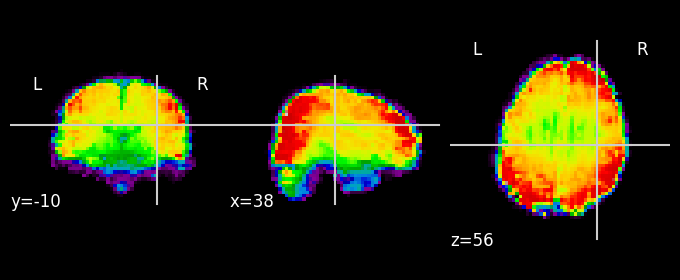

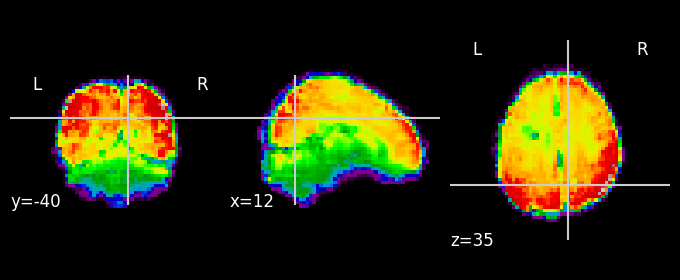

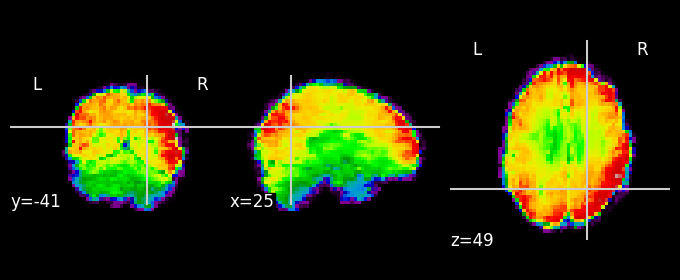

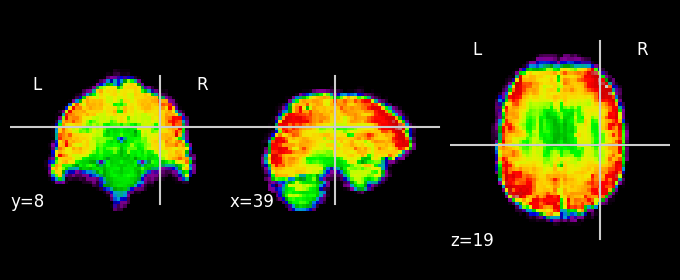

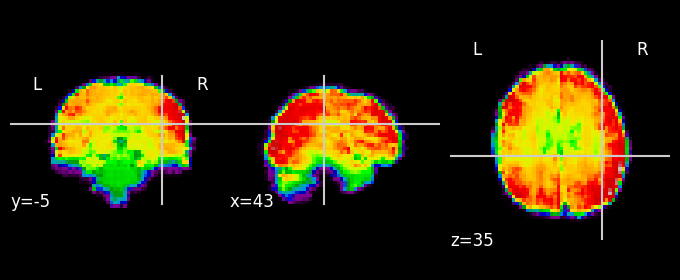

In [ ]:
from nilearn import plotting
from nilearn.image import mean_img

c=0
for i in (fmri_filenames):
    plotting.plot_epi(image.mean_img(i))
    plt.show()
    c+=1
    if c==5:
        break

In [ ]:
mean_img = image.mean_img(fmri_filenames[0])

plotting.plot_stat_map(mean_img, threshold=3, title="plot_stat_map",  cut_coords=[36, -27, 66])